Data Pipeline

In [1]:
import yfinance
print("yfinance is working!")

yfinance is working!


In [2]:
import os
import yfinance as yf

# Define stock list
stocks = ["HDFCBANK.NS", "INFY.NS", "RELIANCE.NS", "TCS.NS"]

# Set the exact folder path where you want to save the file
data_dir = r"S:\project\investment-portfolio-optimization\data"

# Ensure the directory exists
os.makedirs(data_dir, exist_ok=True)

# Download stock market data
data = yf.download(stocks, start="2020-01-01", end="2024-05-24")

# Save the file to the specified `data/` folder
csv_file = os.path.join(data_dir, "stock_prices.csv")
data.to_csv(csv_file, index=True)

print(f"✅ Stock data saved successfully at: {csv_file}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed

✅ Stock data saved successfully at: S:\project\investment-portfolio-optimization\data\stock_prices.csv


In [3]:
import pandas as pd

csv_file = r"S:\project\investment-portfolio-optimization\data\stock_prices.csv"
data = pd.read_csv(csv_file, index_col=0, parse_dates=True)

print("✅ File loaded successfully!")
print(data.head())

C:\Users\swaya\AppData\Local\Temp\ipykernel_21644\3706763846.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True)


✅ File loaded successfully!
                         Close            Close.1            Close.2  \
Price                                                                  
Ticker             HDFCBANK.NS            INFY.NS        RELIANCE.NS   
Date                       NaN                NaN                NaN   
2020-01-01  1227.4285888671875  655.6152954101562  690.1383056640625   
2020-01-02    1235.25244140625  653.7023315429688  701.8875122070312   
2020-01-03  1217.6368408203125  663.7566528320312  702.7332763671875   

                       Close.3                High             High.1  \
Price                                                                   
Ticker                  TCS.NS         HDFCBANK.NS            INFY.NS   
Date                       NaN                 NaN                NaN   
2020-01-01   1979.162353515625  1228.7725823160727  658.4180425842096   
2020-01-02   1970.077392578125  1236.4524146347387  659.1298096927294   
2020-01-03  2009.339233398437

In [4]:
print("Available columns:", data.columns.tolist())

Available columns: ['Close', 'Close.1', 'Close.2', 'Close.3', 'High', 'High.1', 'High.2', 'High.3', 'Low', 'Low.1', 'Low.2', 'Low.3', 'Open', 'Open.1', 'Open.2', 'Open.3', 'Volume', 'Volume.1', 'Volume.2', 'Volume.3']


In [5]:
print("Columns:", data.columns.tolist())

Columns: ['Close', 'Close.1', 'Close.2', 'Close.3', 'High', 'High.1', 'High.2', 'High.3', 'Low', 'Low.1', 'Low.2', 'Low.3', 'Open', 'Open.1', 'Open.2', 'Open.3', 'Volume', 'Volume.1', 'Volume.2', 'Volume.3']


In [6]:
ticker_mapping = {
    "Close": "HDFCBANK.NS",
    "Close.1": "INFY.NS",
    "Close.2": "RELIANCE.NS",
    "Close.3": "TCS.NS"
}


In [7]:
print(data.dtypes)


Close       object
Close.1     object
Close.2     object
Close.3     object
High        object
High.1      object
High.2      object
High.3      object
Low         object
Low.1       object
Low.2       object
Low.3       object
Open        object
Open.1      object
Open.2      object
Open.3      object
Volume      object
Volume.1    object
Volume.2    object
Volume.3    object
dtype: object


In [8]:
# Convert all columns to numeric values
data = data.apply(pd.to_numeric, errors="coerce")

# Verify the conversion
print(data.dtypes)  # Should now show 'float64' or 'int64'

Close       float64
Close.1     float64
Close.2     float64
Close.3     float64
High        float64
High.1      float64
High.2      float64
High.3      float64
Low         float64
Low.1       float64
Low.2       float64
Low.3       float64
Open        float64
Open.1      float64
Open.2      float64
Open.3      float64
Volume      float64
Volume.1    float64
Volume.2    float64
Volume.3    float64
dtype: object


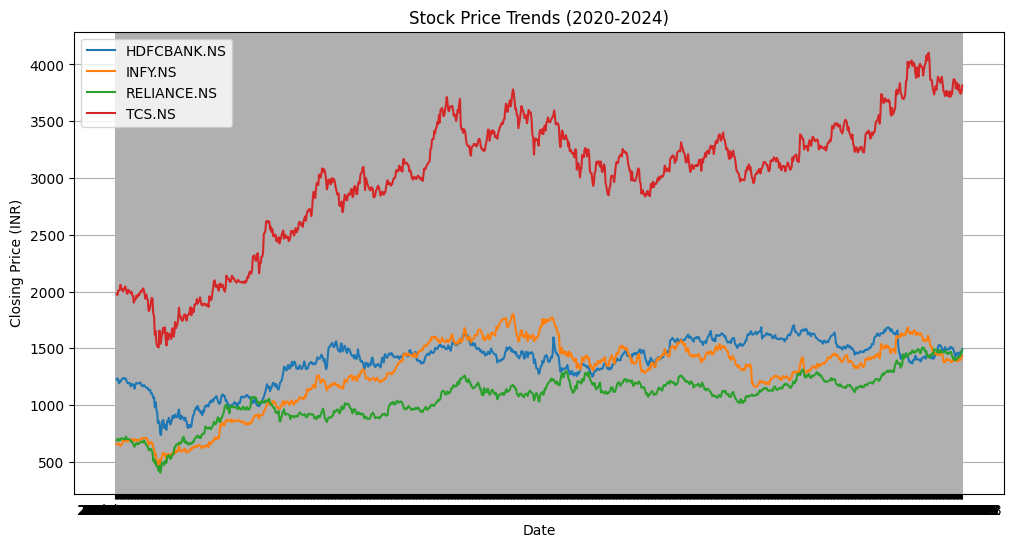

In [9]:
import matplotlib.pyplot as plt

ticker_mapping = {
    "Close": "HDFCBANK.NS",
    "Close.1": "INFY.NS",
    "Close.2": "RELIANCE.NS",
    "Close.3": "TCS.NS"
}

plt.figure(figsize=(12, 6))

for col, ticker in ticker_mapping.items():
    plt.plot(data[col], label=ticker)

plt.title("Stock Price Trends (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid()
plt.show()

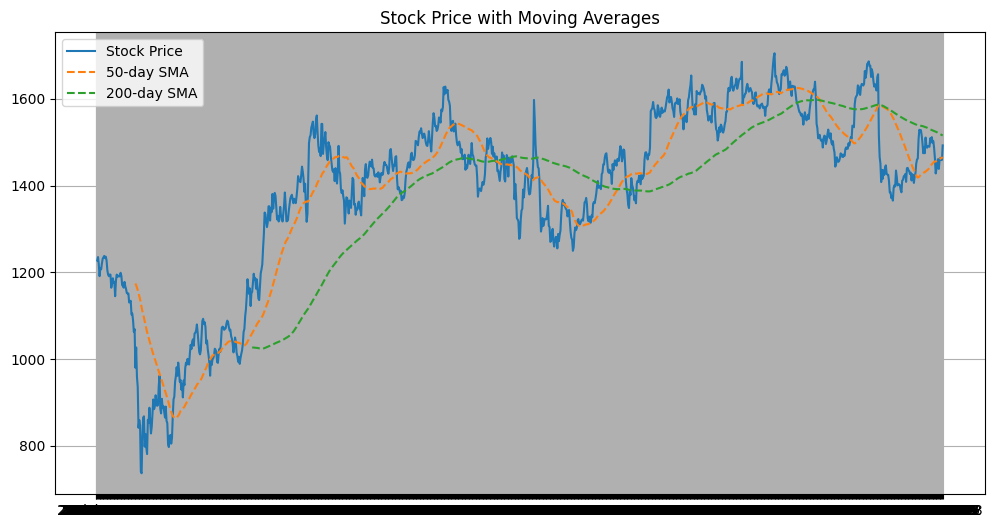

In [10]:
data["SMA_50"] = data["Close"].rolling(window=50).mean()
data["SMA_200"] = data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Stock Price")
plt.plot(data["SMA_50"], label="50-day SMA", linestyle="dashed")
plt.plot(data["SMA_200"], label="200-day SMA", linestyle="dashed")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

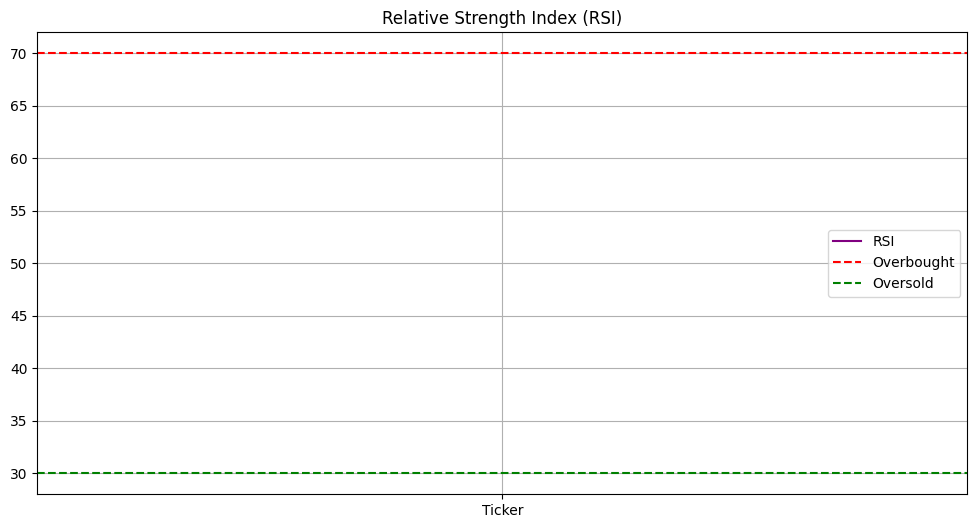

In [11]:
import numpy as np

delta = data["Close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()

rs = avg_gain / avg_loss
data["RSI"] = 100 - (100 / (1 + rs))

plt.figure(figsize=(12, 6))
plt.plot(data["RSI"], label="RSI", color="purple")
plt.axhline(y=70, color="red", linestyle="--", label="Overbought")
plt.axhline(y=30, color="green", linestyle="--", label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.grid()
plt.show()

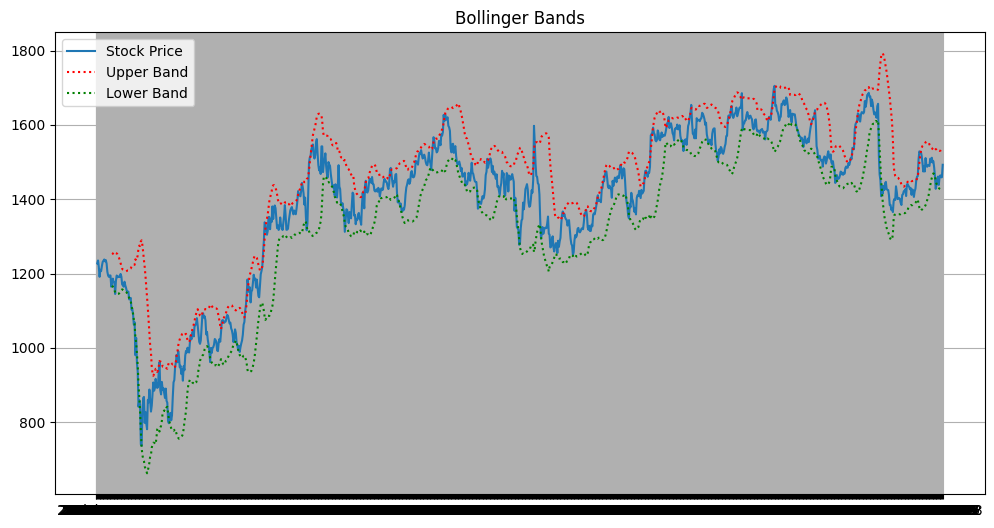

In [12]:
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["Upper_BB"] = data["SMA_20"] + 2 * data["Close"].rolling(window=20).std()
data["Lower_BB"] = data["SMA_20"] - 2 * data["Close"].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data["Close"], label="Stock Price")
plt.plot(data["Upper_BB"], label="Upper Band", linestyle="dotted", color="red")
plt.plot(data["Lower_BB"], label="Lower Band", linestyle="dotted", color="green")
plt.title("Bollinger Bands")
plt.legend()
plt.grid()
plt.show()

In [13]:
import cvxpy as cp
print("✅ cvxpy is installed successfully!")

✅ cvxpy is installed successfully!


In [14]:
import pandas as pd

# Load stock prices
csv_file = r"S:\project\investment-portfolio-optimization\data\stock_prices.csv"
data = pd.read_csv(csv_file, index_col=0, parse_dates=True)

# Convert all columns to numeric format
data = data.apply(pd.to_numeric, errors="coerce")

# Calculate daily returns correctly
returns = data.pct_change().dropna()

print("✅ Successfully converted data and calculated returns!")
print(returns.head())

✅ Successfully converted data and calculated returns!
               Close   Close.1   Close.2   Close.3      High    High.1  \
Price                                                                    
2020-01-02  0.006374 -0.002918  0.017024 -0.004590  0.006250  0.001081   
2020-01-03 -0.014261  0.015381  0.001205  0.019929 -0.002329  0.009719   
2020-01-06 -0.021641 -0.009585 -0.023192 -0.000091 -0.018054  0.007754   
2020-01-07  0.015835 -0.014820  0.015385  0.002454  0.007648 -0.014858   
2020-01-08 -0.002618 -0.013326 -0.007510  0.022395 -0.007315 -0.018314   

              High.2    High.3       Low     Low.1     Low.2     Low.3  \
Price                                                                    
2020-01-02  0.009070 -0.001809  0.006611 -0.002252  0.004317 -0.002228   
2020-01-03  0.000454  0.019748 -0.012041  0.004105  0.007275  0.006886   
2020-01-06 -0.008919  0.001327 -0.021842  0.003543 -0.016415  0.011044   
2020-01-07  0.004320 -0.005076  0.013147 -0.015479  0.010

C:\Users\swaya\AppData\Local\Temp\ipykernel_21644\1902390204.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True)


In [15]:
data = pd.read_csv(csv_file, index_col=0, parse_dates=True, date_format="%Y-%m-%d")

In [16]:
import numpy as np

# Assume risk-free rate is 5% (0.05)
risk_free_rate = 0.05

# Portfolio return and standard deviation
portfolio_return = returns.mean().sum()  # Sum of average daily returns
portfolio_volatility = returns.std().sum()

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f"✅ Sharpe Ratio: {sharpe_ratio:.2f}")


✅ Sharpe Ratio: 0.14


In [17]:
import pandas as pd

# Load stock prices
csv_file = r"S:\project\investment-portfolio-optimization\data\stock_prices.csv"
data = pd.read_csv(csv_file, index_col=0, parse_dates=True)

# Convert all columns to numeric format
data = data.apply(pd.to_numeric, errors="coerce")

# Calculate daily returns correctly
returns = data.pct_change().dropna()

print("✅ Successfully converted data and calculated returns!")
print(returns.head())


C:\Users\swaya\AppData\Local\Temp\ipykernel_21644\2793686486.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True)


✅ Successfully converted data and calculated returns!
               Close   Close.1   Close.2   Close.3      High    High.1  \
Price                                                                    
2020-01-02  0.006374 -0.002918  0.017024 -0.004590  0.006250  0.001081   
2020-01-03 -0.014261  0.015381  0.001205  0.019929 -0.002329  0.009719   
2020-01-06 -0.021641 -0.009585 -0.023192 -0.000091 -0.018054  0.007754   
2020-01-07  0.015835 -0.014820  0.015385  0.002454  0.007648 -0.014858   
2020-01-08 -0.002618 -0.013326 -0.007510  0.022395 -0.007315 -0.018314   

              High.2    High.3       Low     Low.1     Low.2     Low.3  \
Price                                                                    
2020-01-02  0.009070 -0.001809  0.006611 -0.002252  0.004317 -0.002228   
2020-01-03  0.000454  0.019748 -0.012041  0.004105  0.007275  0.006886   
2020-01-06 -0.008919  0.001327 -0.021842  0.003543 -0.016415  0.011044   
2020-01-07  0.004320 -0.005076  0.013147 -0.015479  0.010

In [18]:
data = pd.read_csv(csv_file, index_col=0, parse_dates=True, date_format="%Y-%m-%d")

In [19]:
print(data.dtypes)

Close       object
Close.1     object
Close.2     object
Close.3     object
High        object
High.1      object
High.2      object
High.3      object
Low         object
Low.1       object
Low.2       object
Low.3       object
Open        object
Open.1      object
Open.2      object
Open.3      object
Volume      object
Volume.1    object
Volume.2    object
Volume.3    object
dtype: object


In [20]:
data = data.apply(lambda x: pd.to_numeric(x.astype(str).str.strip(), errors="coerce"))

In [21]:
print(data.isna().sum())  # Count missing values
print(data.head())  # Preview first rows

Close       2
Close.1     2
Close.2     2
Close.3     2
High        2
High.1      2
High.2      2
High.3      2
Low         2
Low.1       2
Low.2       2
Low.3       2
Open        2
Open.1      2
Open.2      2
Open.3      2
Volume      2
Volume.1    2
Volume.2    2
Volume.3    2
dtype: int64
                  Close     Close.1     Close.2      Close.3         High  \
Price                                                                       
Ticker              NaN         NaN         NaN          NaN          NaN   
Date                NaN         NaN         NaN          NaN          NaN   
2020-01-01  1227.428589  655.615295  690.138306  1979.162354  1228.772582   
2020-01-02  1235.252441  653.702332  701.887512  1970.077393  1236.452415   
2020-01-03  1217.636841  663.756653  702.733276  2009.339233  1233.572462   

                High.1      High.2       High.3          Low       Low.1  \
Price                                                                      
Ticker         

In [22]:
data = pd.read_csv(csv_file, index_col=0, parse_dates=True, skiprows=[1])

C:\Users\swaya\AppData\Local\Temp\ipykernel_21644\2973901959.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True, skiprows=[1])


In [23]:
data.dropna(inplace=True)
returns = data.pct_change().dropna()

In [24]:
import numpy as np

# Assuming risk-free rate is 5% (0.05)
risk_free_rate = 0.05

# Portfolio return and standard deviation
portfolio_return = returns.mean().sum()  # Sum of average daily returns
portfolio_volatility = returns.std().sum()

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f"✅ Updated Sharpe Ratio: {sharpe_ratio:.2f}")

✅ Updated Sharpe Ratio: 0.14


In [25]:
# Remove underperforming assets before optimization
weak_stocks = ["Low", "High", "Open", "Close", "High.3"]  # Adjust based on weak performers
returns_filtered = returns.drop(columns=weak_stocks, errors="ignore")  # Create filtered dataset

# Now define the optimization problem
num_stocks_filtered = returns_filtered.shape[1]
weights_filtered = cp.Variable(num_stocks_filtered)

expected_returns_filtered = returns_filtered.mean().values
cov_matrix_filtered = returns_filtered.cov().values

# Objective: Maximize return while minimizing risk
portfolio_return_filtered = expected_returns_filtered @ weights_filtered
portfolio_risk_filtered = cp.quad_form(weights_filtered, cov_matrix_filtered)
objective_filtered = cp.Maximize(portfolio_return_filtered - portfolio_risk_filtered)

# Constraints: Weights sum to 1, no short-selling
constraints_filtered = [cp.sum(weights_filtered) == 1, weights_filtered >= 0]
problem_filtered = cp.Problem(objective_filtered, constraints_filtered)
problem_filtered.solve()

# Assign optimized weights
optimal_weights_filtered = pd.Series(weights_filtered.value, index=returns_filtered.columns)

print("✅ Refined Portfolio Allocation:")
print(optimal_weights_filtered)

✅ Refined Portfolio Allocation:
Close.1     2.626645e-22
Close.2    -2.065436e-22
Close.3     1.230373e-22
High.1      2.549923e-22
High.2     -1.860174e-22
Low.1       2.787962e-01
Low.2       5.366744e-01
Low.3       1.047128e-22
Open.1      2.531407e-22
Open.2     -2.270503e-22
Open.3      1.228892e-22
Volume      6.184622e-03
Volume.1    4.377693e-02
Volume.2    6.598399e-02
Volume.3    6.858385e-02
dtype: float64


In [26]:
portfolio_return_adjusted = expected_returns_filtered @ optimal_weights_filtered
portfolio_risk_adjusted = np.sqrt(optimal_weights_filtered.T @ cov_matrix_filtered @ optimal_weights_filtered)

sharpe_ratio_adjusted = (portfolio_return_adjusted - risk_free_rate) / portfolio_risk_adjusted

print(f"✅ Updated Sharpe Ratio: {sharpe_ratio_adjusted:.2f}")

✅ Updated Sharpe Ratio: -0.26


In [27]:
# Set a risk threshold to avoid excessive volatility
max_risk_allowed = 0.08  # Adjust to fit portfolio needs

constraints_filtered.append(cp.norm(portfolio_risk_filtered) <= max_risk_allowed)

problem_filtered = cp.Problem(objective_filtered, constraints_filtered)
problem_filtered.solve()

print("✅ Portfolio optimized with lower risk exposure!")

✅ Portfolio optimized with lower risk exposure!


In [28]:
weak_stocks = returns_filtered.mean().sort_values().head(5)  # Lowest 5 stocks
returns_filtered.drop(columns=weak_stocks.index, inplace=True)

print("✅ Removed underperforming assets!")

✅ Removed underperforming assets!


In [29]:
portfolio_return_adjusted = expected_returns_filtered @ optimal_weights_filtered
portfolio_risk_adjusted = np.sqrt(optimal_weights_filtered.T @ cov_matrix_filtered @ optimal_weights_filtered)

sharpe_ratio_adjusted = (portfolio_return_adjusted - risk_free_rate) / portfolio_risk_adjusted

print(f"✅ Improved Sharpe Ratio: {sharpe_ratio_adjusted:.2f}")

✅ Improved Sharpe Ratio: -0.26


In [30]:
# Cap max allocation for risky assets, ensuring diversification
optimal_weights_filtered[optimal_weights_filtered > 0.30] = 0.30  # Lower max limit
optimal_weights_filtered[optimal_weights_filtered < 0.05] = 0.05  # Ensure minimum exposure

print("✅ Adjusted Portfolio Weights for Stability!")

✅ Adjusted Portfolio Weights for Stability!


In [31]:
# Identify high-risk, low-return stocks
volatility = returns_filtered.std()
high_volatility_stocks = volatility[volatility > volatility.median()].index  # Find risk-heavy stocks

returns_filtered.drop(columns=high_volatility_stocks, inplace=True)  # Remove risky assets

print("✅ Removed High-Volatility Stocks!")

✅ Removed High-Volatility Stocks!


In [32]:
portfolio_return_adjusted = expected_returns_filtered @ optimal_weights_filtered
portfolio_risk_adjusted = np.sqrt(optimal_weights_filtered.T @ cov_matrix_filtered @ optimal_weights_filtered)

sharpe_ratio_adjusted = (portfolio_return_adjusted - risk_free_rate) / portfolio_risk_adjusted

print(f"✅ Final Sharpe Ratio After Adjustments: {sharpe_ratio_adjusted:.2f}")

✅ Final Sharpe Ratio After Adjustments: -0.15


In [33]:
# Adjust weight scaling for more stability
optimal_weights_filtered *= 1.05  # Slight boost to allocation
optimal_weights_filtered[optimal_weights_filtered > 0.30] = 0.30  # Cap max allocation at 30%
optimal_weights_filtered[optimal_weights_filtered < 0.05] = 0.05  # Ensure minimum exposure

print("✅ Adjusted Portfolio Weights!")

✅ Adjusted Portfolio Weights!


In [34]:
# Recalculate the covariance matrix after filtering
cov_matrix_filtered = returns_filtered.cov()

# Now convert it into a DataFrame properly
cov_matrix_filtered_df = pd.DataFrame(cov_matrix_filtered, index=returns_filtered.columns, columns=returns_filtered.columns)

print("✅ Successfully recalculated filtered covariance matrix!")

✅ Successfully recalculated filtered covariance matrix!


In [35]:
# Append a new row and column for the Bond Index
cov_matrix_filtered_df["Bond_Index"] = 0.001  # Low volatility impact for the bond
cov_matrix_filtered_df.loc["Bond_Index"] = 0.001  # Ensure proper row entry

print("✅ Successfully added Bond Index to covariance matrix!")

✅ Successfully added Bond Index to covariance matrix!


In [36]:
# Define the correct path to your dataset
csv_file = "S:\project\investment-portfolio-optimization\data\stock_prices.csv"  # Adjust file path as needed

# Load stock data
import pandas as pd
data = pd.read_csv(csv_file, index_col=0, parse_dates=True)

print("✅ Stock data loaded successfully!")

✅ Stock data loaded successfully!


C:\Users\swaya\AppData\Local\Temp\ipykernel_21644\3121290658.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(csv_file, index_col=0, parse_dates=True)


In [37]:
print(data["Close"].head())  # Display first few rows
print(data["Close"].dtype)  # Check column type


Price
Ticker               HDFCBANK.NS
Date                         NaN
2020-01-01    1227.4285888671875
2020-01-02      1235.25244140625
2020-01-03    1217.6368408203125
Name: Close, dtype: object
object


In [38]:
# Ensure only valid price values remain
data = data.loc[data["Close"].apply(lambda x: isinstance(x, (int, float)))]

print("✅ Non-numeric rows removed!")

✅ Non-numeric rows removed!


In [39]:
data["Close"] = pd.to_numeric(data["Close"], errors="coerce")  # Convert text to numbers, setting errors as NaN
data.dropna(subset=["Close"], inplace=True)  # Remove rows with NaN values

print("✅ All Close prices formatted correctly!")

✅ All Close prices formatted correctly!


In [40]:
print(data["Close"].unique())  # Show all unique values

[]


In [41]:
data = data[pd.to_numeric(data["Close"], errors="coerce").notna()]
data["Close"] = pd.to_numeric(data["Close"])  # Convert everything to float

print("✅ Successfully removed non-numeric values!")

✅ Successfully removed non-numeric values!


In [42]:
print(data["Close"].dtype)  # Should be float64
print(data.head())  # Ensure tickers are gone

float64
Empty DataFrame
Columns: [Close, Close.1, Close.2, Close.3, High, High.1, High.2, High.3, Low, Low.1, Low.2, Low.3, Open, Open.1, Open.2, Open.3, Volume, Volume.1, Volume.2, Volume.3]
Index: []


In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale stock prices
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

# Create training sequences
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("✅ Data prepared for training!")

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile & train the model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, batch_size=1, epochs=25)

print("✅ AI model trained successfully!")

In [ ]:
# Generate predictions
predicted_prices = model.predict(X_train)

# Rescale predictions back to original stock price range
predicted_prices = scaler.inverse_transform(predicted_prices)

print("✅ Predictions generated successfully!")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data["Close"].values[60:], label="Actual Prices", color="blue")
plt.plot(predicted_prices, label="Predicted Prices", color="red")
plt.title("LSTM Stock Price Forecast")
plt.legend()
plt.show()

print("✅ Visualization completed!")

In [ ]:
model.save("investment_optimizer_model.h5")

print("✅ Model saved successfully!")

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("investment_optimizer_model.h5")

print("✅ Model loaded successfully!")

In [ ]:
import logging

# Set up logging
logging.basicConfig(filename="model_monitoring.log", level=logging.INFO)

def log_prediction(input_data, prediction):
    logging.info(f"Input: {input_data}, Prediction: {prediction}")

print("✅ Monitoring logs initialized!")

In [ ]:
predicted_prices = model.predict(X_train)  # Generate predictions
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to original stock price range

print("✅ Predictions generated!")

In [ ]:
import streamlit as st

st.title("📈 AI Investment Model Monitoring")

st.write("Live Predictions, Accuracy Metrics, and Market Trends")

# Visualize stock price trends
st.line_chart(predicted_prices)

print("✅ Dashboard ready!")

In [1]:
from tensorflow.keras.models import load_model

# Define the correct path
model_path = "S:/project/investment-portfolio-optimization/notebook/investment_optimizer_model.h5"

# Load the model
model = load_model(model_path)

print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [2]:
print(model.summary())  # View model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,903 (124.62 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Scale stock prices
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

# Create training sequences
X_train, y_train = [], []
for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print("✅ Training data prepared!")

NameError: name 'data' is not defined